# Going on a random walk

## The Random Walk Process
#### A random walk is a process in which there is an equal chance of going up or down by a random number. This is usually observed in financial and economic data, like the daily closing price of GOOGL. Random walks often expose long periods where a positive or negative trend can be observed. They are also often accompanied by sudden changes in direction.

#### In a random walk process, we say that the present value yt is a function of the value at the previous timestep yt–1, a constant C, and a random number ϵt, also termed white noise. Here, ϵt is the realization of the standard normal distribution, which has a variance of 1 and a mean of 0.

#### Therefore, we can mathematically express a random walk with the following equation, where yt is the value at the present time t, C is a constant, yt–1 is the value at the previous timestep t–1, and ϵt is a random number.

- yt = C + yt–1 + ϵt



In [1]:
import numpy as np
 
np.random.seed(42)
 
steps = np.random.standard_normal(1000)
steps[0]=0
 
random_walk = np.cumsum(steps)    

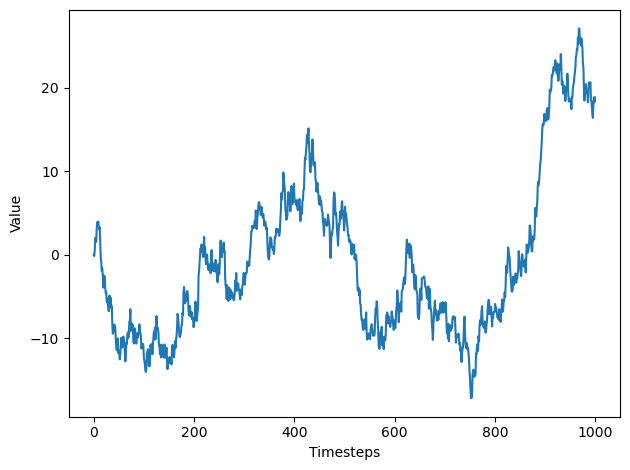

In [3]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots()
 
ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
 
plt.tight_layout()

## Identifying a random walk

#### To determine if our time series can be approximated as a random walk or not, we must first define a random walk. In the context of time series, a random walk is defined as a series whose first difference is stationary and uncorrelated.

- A random walk is a series whose first difference is stationary and uncorrelated.
- This means that the process moves completely at random.


#### Stationarity
#### A stationary time series is one whose statistical properties do not change over time. In other words, it has a constant mean, variance, and autocorrelation, and these properties are independent of time.

#### Many forecasting models assume stationarity. The moving average model (chapter 4), autoregressive model (chapter 5), and autoregressive moving average model (chapter 6) all assume stationarity. These models can only be used if we verify that the data is indeed stationary. Otherwise, the models will not be valid, and the forecasts will not be reliable. Intuitively, this makes sense, because if the data is non-stationary, its properties are going to change over time, which would mean that our model parameters must also change through time. This means that we cannot possibly derive a function of future values as a function of past values, since the coefficients change at each point in time, making forecasting unreliable.

## Stationarity

- A stationary process is one whose statistical properties do not change over time.
- A times series is said to be stationary if its mean, variance, and autocorrelation do not change over time.



#### The simplest transformation one can apply is differencing. This transformation helps stabilize the mean, which in turn removes or reduces the trend and seasonality effects. Differencing involves calculating the series of changes from one timestep to another. To accomplish that, we simply subtract the value of the previous timestep yt–1 from the value in the present yt to obtain the differenced value y't.

#### Differencing is a transformation that calculates the change from one timestep to another. This transformation is useful for stabilizing the mean.

#### Applying a log function to the series can stabilize its variance.

#### It is possible to difference a time series many times. Taking the difference once is applying a first-order differencing. Taking it a second time would be a second-order differencing. It is often not necessary to difference more than twice to obtain a stationary series.

##### Keep in mind that when we model a time series that has been transformed, we must untransform it to return the results of the model to the original units of measurement. The formal term for undoing a transformation is inverse transform. Therefore, if you apply a log transformation to your data, make sure you raise your forecast values to the power of 10 in order to bring the values back to their original magnitude. That way, your predictions will make sense in their original context.

## Testing for stationarity

#### Once a transformation is applied to a time series, we need to test for stationarity to determine if we need to apply another transformation to make the time series stationary, or if we need to transform it at all. A common test is the augmented Dickey-Fuller (ADF) test.

#### The ADF test verifies the following null hypothesis: there is a unit root present in a time series. The alternative hypothesis is that there is no unit root, and therefore the time series is stationary. The result of this test is the ADF statistic, which is a negative number. The more negative it is, the stronger the rejection of the null hypothesis. In its implementation in Python, the p-value is also returned. If its value is less than 0.05, we can also reject the null hypothesis and say the series is stationary.

#### Let’s consider a very simple time series where the present value yt only depends on its past value yt–1 subject to a coefficient α1, a constant C, and white noise ϵt. We can write the following general expression:

- yt = C + α1yt–1 + ϵt

#### In equation 3.8, ϵt represents some error that we cannot predict, and C is a constant. Here, α1 is the root of the time series. This time series will be stationary only if the root lies within the unit circle. Therefore, its value must be between –1 and 1. Otherwise the series is non-stationary.

#### Let’s verify this by simulating two different series. One will be stationary and the other will have a unit root, meaning that it will not be stationary. The stationary process follows equation 3.9, and the non-stationary process follows equation 3.10.

- yt = 0.5yt–1 + ϵt
- Equation 3.9

- yt = yt–1 + ϵt
- Equation 3.10

#### In equation 3.9, the root of the series is 0.5. Since it is between –1 and 1, this series is stationary. On the other hand, in equation 3.10, the root of the series is 1, meaning that it is a unit root. Therefore, we expect this series to be non-stationary.

#### By now, you should be convinced that a series with a unit root is not a stationary series. In both figures 3.7 and 3.8, the mean and variance were dependent on time, as their values kept changing. Meanwhile, the series with a root of 0.5 displayed a constant mean and variance over time, demonstrating that this series is indeed stationary.

#### All these steps were performed to justify the use of the augmented Dickey-Fuller (ADF) test. We know that the ADF test verifies the presence of a unit root in the series. The null hypothesis, stating that a unit root is present, means that the series is not stationary. If the test returns a p-value less than a certain significance level, typically 0.05 or 0.01, then we can reject the null hypothesis, meaning that there are no unit roots, and so the series is stationar

#### Once we have a stationary series, we must determine whether there is autocorrelation or not. Remember that a random walk is a series whose first difference is stationary and uncorrelated. The ADF test takes care of the stationarity portion, but we’ll need to use the autocorrelation function to determine if the series is correlated or not.

#### We know that correlation measures the extent of a linear relationship between two variables. Autocorrelation therefore measures the linear relationship between lagged values of a time series. Thus, the ACF reveals how the correlation between any two values changes as the lag increases. Here, the lag is simply the number of timesteps separating two values.

#### In other words, it measures the correlation of the time series with itself.

#### For example, we can calculate the autocorrelation coefficient between yt and yt–1. In this case, the lag is equal to 1, and the coefficient would be denoted as r1. Similarly, we can calculate the autocorrelation between yt and yt–2. Then the lag would be 2, and the coefficient would be denoted as r2. When we plot the ACF function, the coefficient is the dependent variable, while the lag is the independent variable. Note that the autocorrelation coefficient at lag 0 will always be equal to 1. This makes sense intuitively, because the linear relationship between a variable and itself at the same timestep should be perfect, and therefore equal to 1.

#### In the presence of a trend, a plot of the ACF will show that the coefficients are high for short lags, and they will decrease linearly as the lag increases. If the data is seasonal, the ACF plot will also display cyclical patterns. Therefore, plotting the ACF function of a non-stationary process will not give us more information than is available by looking at the evolution of our process through time. However, plotting the ACF for a stationary process can help us identify the presence of a random walk.

In [6]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(random_walk)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')  

ADF Statistic: -0.9659524876918767
p-value: 0.7654789696692575


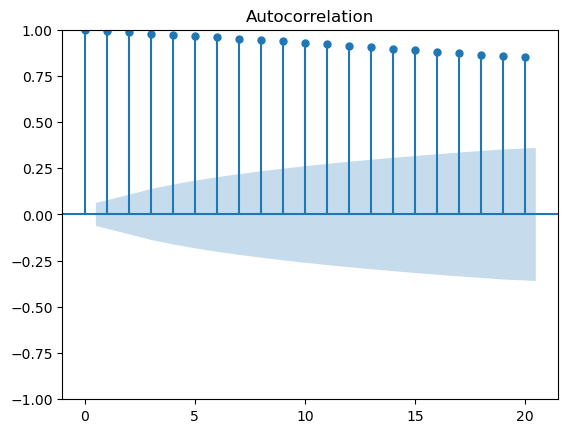

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(random_walk, lags=20); 

#### you’ll notice how the autocorrelation coefficients slowly decrease as the lag increases, which is a clear indicator that our random walk is not a stationary process. Note that the shaded area represents a confidence interval. If a point is within the shaded area, then it is not significantly different from 0. Otherwise, the autocorrelation coefficient is significant.

In [8]:
diff_random_walk = np.diff(random_walk, n=1)

In [10]:
ADF_result = adfuller(diff_random_walk)
 
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -31.789310857560622
p-value: 0.0


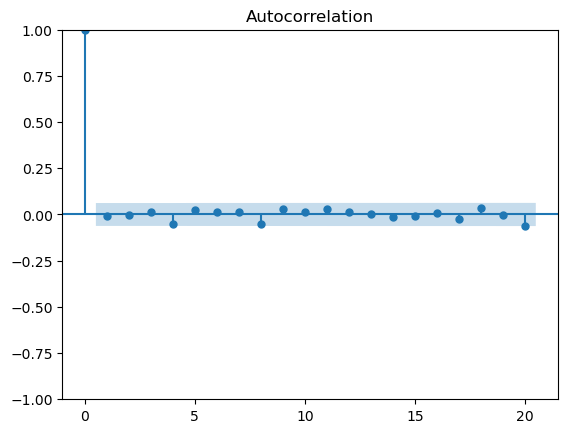

In [11]:
plot_acf(diff_random_walk, lags=20);

#### Looking at figure 3.11, you’ll notice that there are no significant autocorrelation coefficients after lag 0. This means that the stationary process is completely random and can therefore be described as white noise. Each value is simply a random step away from the previous one, with no relation between them.

In [14]:
import pandas as pd
df = pd.read_csv("/Users/maukanmir/Documents/Machine-Learning/AI-ML-Textbooks/AI-ML-Learning/Data/GOOGL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600
...,...,...,...,...,...,...,...
248,2021-04-21,2272.050049,2280.000000,2244.820068,2278.350098,2278.350098,1160200
249,2021-04-22,2275.399902,2288.879883,2240.320068,2252.520020,2252.520020,1207300
250,2021-04-23,2267.000000,2306.120117,2261.250000,2299.929932,2299.929932,1453300
251,2021-04-26,2304.520020,2324.530029,2297.320068,2309.929932,2309.929932,1595200


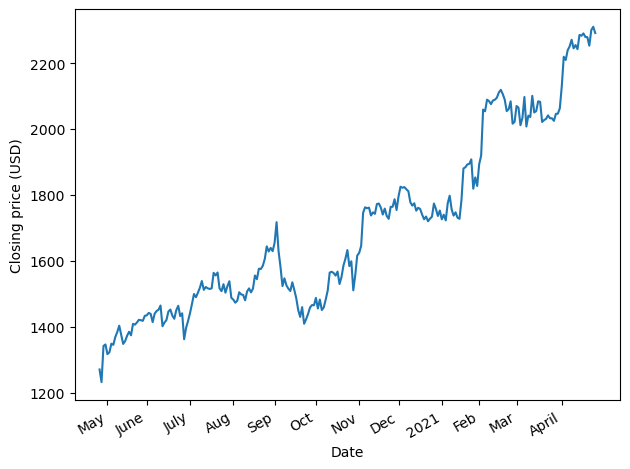

In [15]:
fig, ax = plt.subplots()
 
ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')
 
plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235], 
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 2021, 'Feb',
'Mar', 'April'])
 
fig.autofmt_xdate()
plt.tight_layout()

#### Looking at figure 3.12, we can see a trend in the data as the closing price is increasing over time; therefore, we do not have a stationary process. This is further supported by the ADF test:

In [21]:
GOOGL_ADF_result = adfuller(df['Close'])
print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

ADF Statistic: 0.1602504866477137
p-value: 0.9699419435913057


In [22]:
diff_close = np.diff(df['Close'], n=1)

In [23]:
GOOGL_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')

ADF Statistic: -5.303439704295224
p-value: 5.386530961454829e-06


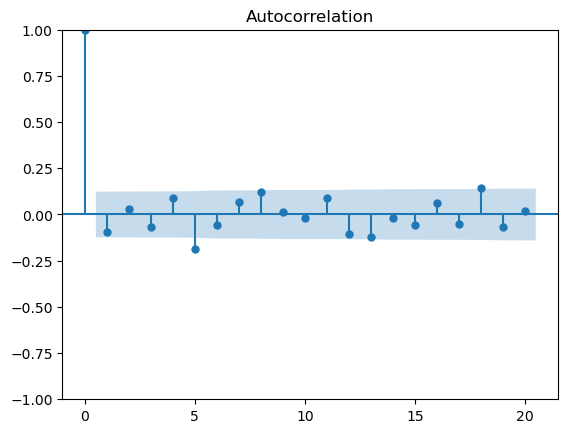

In [25]:
plot_acf(diff_close, lags=20);

#### Predicting a random change is impossible, unless we predict a random value ourselves, which is not ideal. In this case, we can only use naive forecasting methods, or baselines, which we covered in chapter 2. Since the values change randomly, no statistical learning model can be applied. Instead, we can only reasonably predict the historical mean, or the last value

#### In this section, we’ll forecast a random walk on a long horizon. This is not an ideal case—a random walk can unexpectedly increase or decrease because past observations are not predictive of changes in the future. Here we’ll continue working with our simulated random walk from section 3.1.1.

In [26]:
import pandas as pd
 
df = pd.DataFrame({'value': random_walk})
 
train = df[:800]
test = df[800:]

In [27]:
mean = np.mean(train.value)
 
test.loc[:, 'pred_mean'] = mean 
 
test.head()  

/var/folders/bb/2qsf8cm95jg05zrms2_8m2qr0000gn/T/ipykernel_84983/1702972494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = mean


,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


In [28]:
last_value = train.iloc[-1].value
test.loc[:, 'pred_last'] = last_value
test.head()

/var/folders/bb/2qsf8cm95jg05zrms2_8m2qr0000gn/T/ipykernel_84983/2342727651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last'] = last_value


,value,pred_mean,pred_last
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


#### Finally, we’ll apply the drift method, which we have not covered yet. The drift method is a modification of predicting the last known value. In this case, we allow the values to increase or decrease over time. The rate at which values will change in the future is equal to that seen in the train set. Therefore, it is equivalent to calculating the slope between the first and last value of the train set and simply extrapolating this straight line into the future.

#### Remember that we can calculate the slope of a straight line by dividing the change in the y-axis by the change in the x-axis. In our case, the change in the y-axis is the difference between the last value of our random walk yf and its initial value yi. Then, the change in the x-axis is equivalent to the number of timesteps minus 1, as shown in equation 3.11.

In [32]:
deltaX = 800 - 1
deltaY = last_value - 0

drift = deltaY / deltaX

x_vals = np.arange(801, 1001, 1)

pred_drift = drift * x_vals

test.loc[:, 'pred_drift'] = pred_drift

test.head()

/var/folders/bb/2qsf8cm95jg05zrms2_8m2qr0000gn/T/ipykernel_84983/3416239770.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_drift'] = pred_drift


,value,pred_mean,pred_last,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.832006
801,-6.392708,-3.677206,-6.814947,-6.840536
802,-6.296588,-3.677206,-6.814947,-6.849065
803,-6.758863,-3.677206,-6.814947,-6.857594
804,-7.193359,-3.677206,-6.814947,-6.866124


#### As expected, this gives us a drift of –0.0085, which means that the values of our forecasts will slowly decrease over time. The drift method simply states that the value of our forecast is linearly dependent on the timestep, the value of the drift, and the initial value of our random walk, as expressed in equation 3.13. Keep in mind that our random walk starts at 0, so we can remove that from equation 3.13.

- forecast = drift × timestep + yi
- forecast = drift × timestep

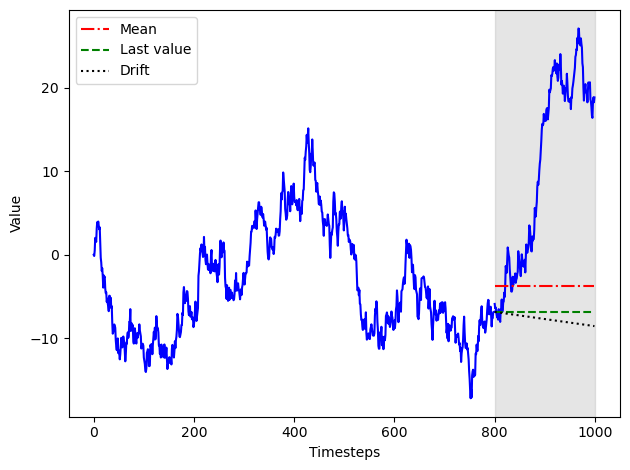

In [34]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

In [35]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])

print(mse_mean, mse_last, mse_drift)

326.50277395297434 425.17260330556167 466.2172769077409


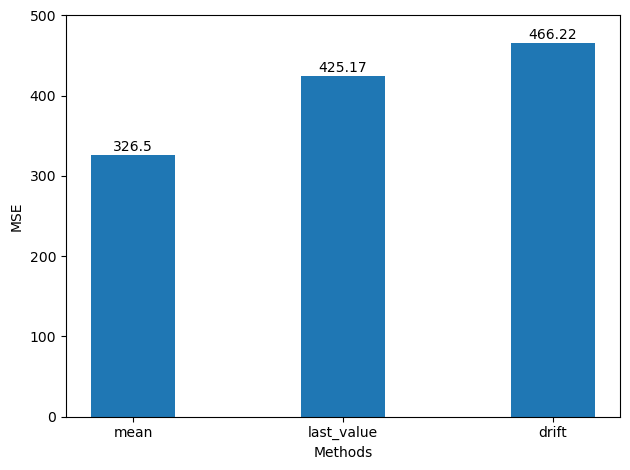

In [37]:
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'drift']
y = [mse_mean, mse_last, mse_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 500)

for index, value in enumerate(y):
    plt.text(x=index, y=value+5, s=str(round(value, 2)), ha='center')

plt.tight_layout()

#### As you can see in figure 3.16, the best forecast was obtained by predicting the historical mean, and yet the MSE exceeds 300. This is an extremely high value considering that our simulated random walk does not exceed the value of 30.
#### By now, you should be convinced that forecasting a random walk on a long horizon does not make sense. Since the future value is dependent on the past value plus a random number, the randomness portion is magnified in a long horizon where many random numbers are added over the course of many timesteps.

##  Forecasting the next timestep
#### Forecasting the next timestep of a random walk is the only reasonable situation we can tackle, although we will still use naive forecasting methods. Specifically, we will predict the last known value. However, we will make this forecast only for the next timestep. That way, our forecast should only be off by a random number, since the future value of a random walk is always the past value plus white noise.

In [38]:
df_shift = df.shift(periods=1)
 
df_shift.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


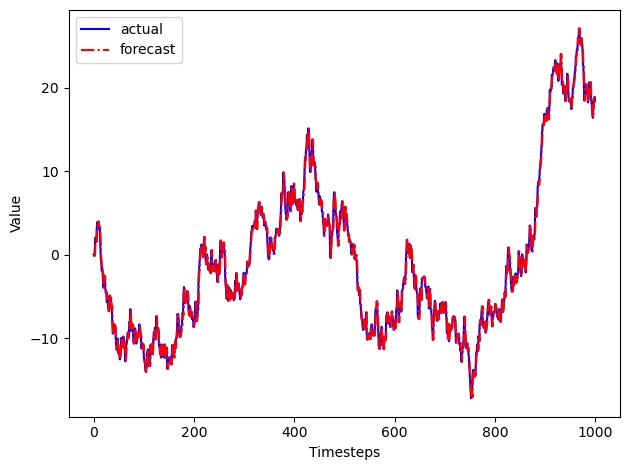

In [39]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

In [40]:
mse_one_step = mean_squared_error(test['value'], df_shift[800:])
 
print(mse_one_step)

0.9256876651440582


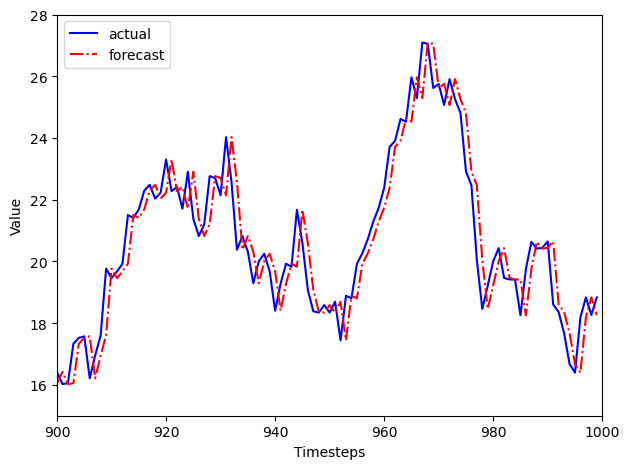

In [41]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlim(900, 1000)
ax.set_ylim(15, 28)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

#### Therefore, if a random walk process must be forecast, it is better to make many short-term forecasts. That way, we do not allow for many random numbers to accumulate over time, which will degrade the quality of our forecasts in the long term.

- A random walk is a process where the first difference is stationary and not autocorrelated.
- We cannot use statistical or deep learning techniques on a random walk, since it moves at random in the future. Therefore, we must use naive forecasts.
- A stationary time series is one whose statistical properties (mean, variance, autocorrelation) do not change over time.
- The augmented Dickey-Fuller (ADF) test is used to assess stationarity by testing for unit roots.
- The null hypothesis of the ADF test is that there is a unit root in the series. If the ADF statistic is a large negative value and the p-value is less than 0.05, the null hypothesis is rejected, and the series is stationary.
- Transformations are used to make a series stationary. Differencing can stabilize the trend and seasonality, while logarithms stabilize the variance.
- Autocorrelation measures the correlation between a variable and itself at a previous timestep (lag). The autocorrelation function (ACF) shows how the autocorrelation changes as a function of the lag.
- Ideally, we will forecast a random walk in the short term or the next timestep. That way, we do not allow for random numbers to accumulate, which will degrade the quality of our forecasts in the long term.